In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv('Datasets/Algerian_forest_fires_dataset_cleaned.csv')

In [11]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [12]:
# drop the day,month and year column
df = df.drop(['day','month','year'],axis=1)

In [13]:
# convert classes column to 0 and 1
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [14]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [15]:
# independent and dependent feature
X = df.drop('FWI',axis = 1)
y = df['FWI']

In [17]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [18]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [19]:
# train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [20]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [21]:
# checking the correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


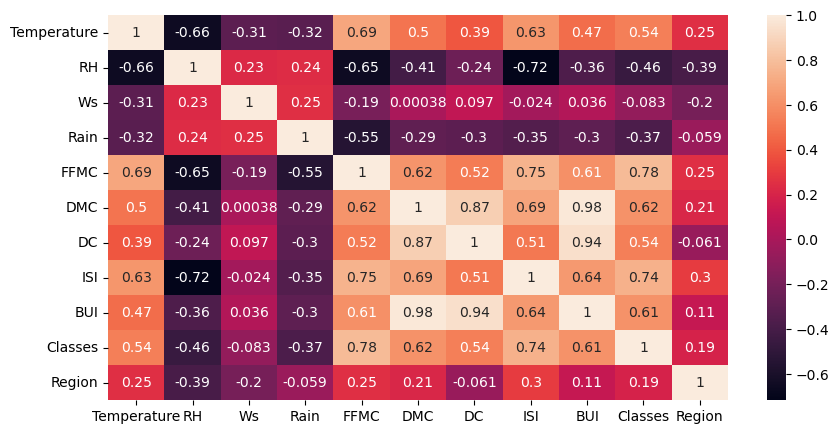

In [22]:
# heatmap for checking correlation
plt.figure(figsize=(10,5))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [27]:
# Handling the Multicollinearity

def correlation(dataset,thresold):
    corr_col = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>thresold:
                colname = corr_matrix.columns[i]
                corr_col.add(colname)

    return corr_col

In [30]:
corr_columns = correlation(X_train,0.85)

In [31]:
# drop the multi collinearity column from dataset
X_train = X_train.drop(corr_columns,axis = 1)
X_test = X_test.drop(corr_columns,axis = 1)

X_train.shape,X_test.shape

((182, 9), (61, 9))

In [32]:
# scaling for the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

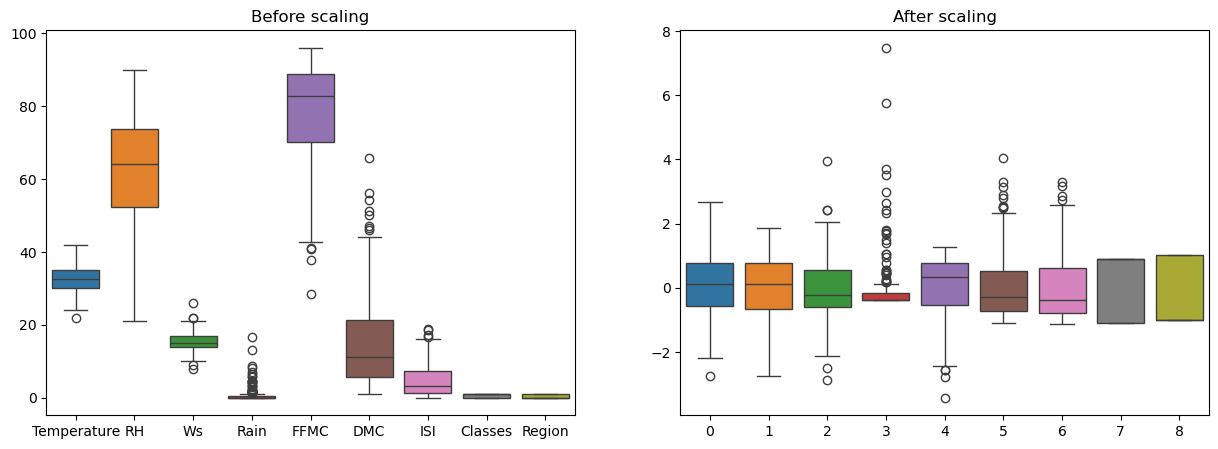

In [33]:
# ploting before and after scaling

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("Before scaling")
plt.subplot(1,2,2)
sns.boxplot(data = scaled_X_train)
plt.title("After scaling")
plt.show()

## Linear Regression

MSE: 0.6742766873791574
R2 scoew: 0.9847657384266952


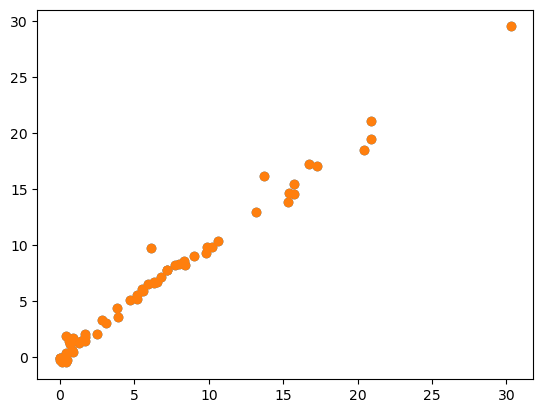

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lin_reg = LinearRegression()
lin_reg.fit(scaled_X_train,y_train)
y_pred = lin_reg.predict(scaled_X_test)

print("MSE:",mean_squared_error(y_test,y_pred))
print("R2 scoew:",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()

## Lasso Regression

MSE: 2.248345891897475
R2 scoew: 0.9492020263112388


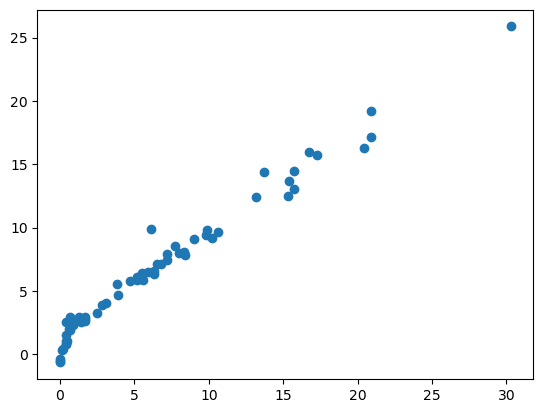

In [37]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score

lasso = Lasso()
lasso.fit(scaled_X_train,y_train)
y_pred = lasso.predict(scaled_X_test)

print("MSE:",mean_squared_error(y_test,y_pred))
print("R2 scoew:",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()

## cross validation with LassoCV

In [38]:
from sklearn.linear_model import LassoCV


lassocv = LassoCV(cv=5)
lassocv.fit(scaled_X_train,y_train)


LassoCV(cv=5)

MSE: 0.792499555474364
R2 scoew: 0.9820946715928274


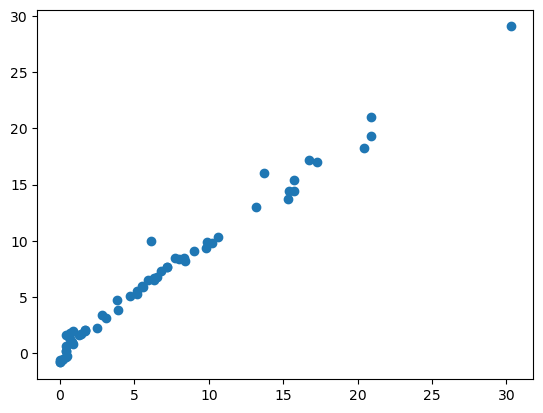

In [40]:
y_pred = lassocv.predict(scaled_X_test)
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2 scoew:",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()


## Ridge Regression

MSE: 0.6949198918152052
R2 scoew: 0.9842993364555513


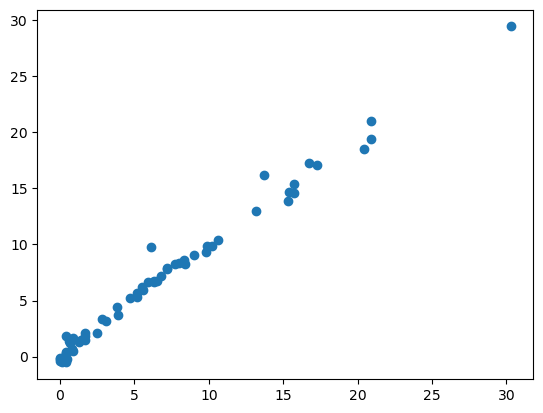

In [41]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score

ridge = Ridge()
ridge.fit(scaled_X_train,y_train)
y_pred = ridge.predict(scaled_X_test)

print("MSE:",mean_squared_error(y_test,y_pred))
print("R2 scoew:",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()

## Cross Validation with Ridge

In [42]:
from sklearn.linear_model import RidgeCV


ridgecv = RidgeCV(cv=5)
ridgecv.fit(scaled_X_train,y_train)

RidgeCV(cv=5)

MSE: 0.6949198918152052
R2 scoew: 0.9842993364555513


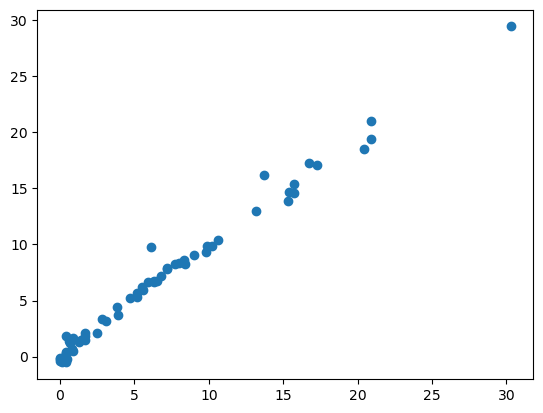

In [43]:
y_pred = ridgecv.predict(scaled_X_test)
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2 scoew:",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()

In [45]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

## Elasticnet Regression

MSE: 5.5172511010252245
R2 scoew: 0.8753460589519703


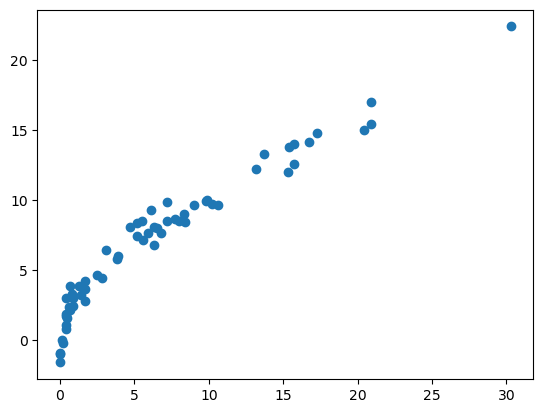

In [46]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,r2_score

elasticnet = ElasticNet()
elasticnet.fit(scaled_X_train,y_train)
y_pred = elasticnet.predict(scaled_X_test)

print("MSE:",mean_squared_error(y_test,y_pred))
print("R2 scoew:",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()

## ElasticNet Cross validation

MSE: 0.8222830416276267
R2 scoew: 0.9814217587854941


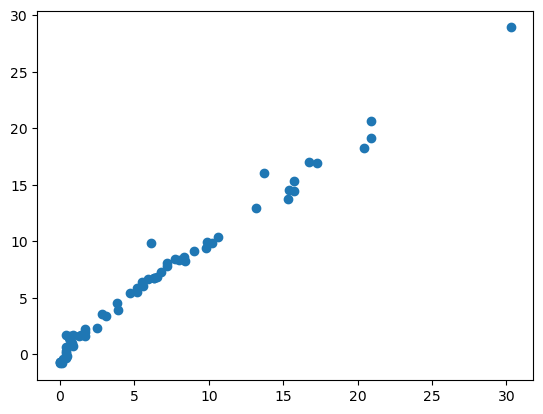

In [47]:
from sklearn.linear_model import ElasticNetCV

elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(scaled_X_train,y_train)
y_pred = elasticnetcv.predict(scaled_X_test)
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2 scoew:",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()

## pickling the model and standard scaler

In [48]:
import pickle


with open("scaler.pkl",'wb') as file:
    pickle.dump(scaler,file)

with open("ridge.pkl",'wb') as file:
    pickle.dump(ridge,file)